In [2]:
import pandas as pd
import numpy as np

In [79]:
import datetime as dt

In [ ]:
import re

In [83]:
idx = pd.IndexSlice

***

[Vai all'indice](#top)  

In [ ]:
from simple_salesforce import Salesforce
import requests
from io import StringIO

In [ ]:
ID org = "00D0Y000001kuxFUAQ"

In [ ]:
sf = Salesforce(username='raffaele.sportiello@wolterskluwer.com',password='Cambiami!', security_token='Hrxlq1DOCzHXWxCEw1sLAFQRm', domain="wktaaeu")

<br>

***

<a id='account_with_assets'></a>
# Account with assets

[Vai all'indice](#top)  

In [71]:
clienti = pd.read_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Data export\IT_all_accounts.csv", encoding='latin-1', sep=";")

In [ ]:
clienti.drop_duplicates(subset=["WK Account Number"], inplace=True)

In [ ]:
clienti["Cliente Merce"] = clienti["WK Account Number"].str.split("-", expand=True)[1]

In [72]:
clienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470140 entries, 0 to 1470139
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Owner Role                398527 non-null   object 
 1   WK Asset Provided By      1469801 non-null  object 
 2   WK Account Number         1470139 non-null  object 
 3   Account Name              1470140 non-null  object 
 4   Active                    1470140 non-null  int64  
 5   Type                      1470140 non-null  object 
 6   Employees                 31 non-null       float64
 7   Created Date              1470140 non-null  object 
 8   Last Activity             518436 non-null   object 
 9   Shipping Street           1470139 non-null  object 
 10  Shipping Zip/Postal Code  1470139 non-null  float64
 11  Shipping City             1470139 non-null  object 
 12  Shipping State/Province   1400914 non-null  object 
 13  VAT Number                1

In [76]:
agen_conc = ["DATAPRIME S.R.L.","ASSO S.N.C.","M2 SOLUTIONS SRLS","PAGHE SICILIA SRL","IPSODEA S.R.L.","ZANCLE CONSULTING","NET PROJECT S.R.L.","DATAJET SAS","CDM INFORMATIKA SNC","SIRIO INFORMATICA","ALTEA  P.S.C.  ARL","EOS SERVIZI S.R.L.","GAM SOLUZIONI S.R.L.","LINK S.A.S.","A & G SYSTEM S.A.S.","SOFTMAINT S.R.L.","DCA SOFTWARE S.R.L.","DOING SRL","SISTEMI UFFICIO","ALL SYSTEM","PMI SOFTWARE","INTEGRA SAS","SE.TI SERVIZI TECNOL","ALL SYSTEMS S.N.C.","IPSOSYS S.R.L.S.","P2000 S.R.L.","AQUILA 99 S.A.S.","LEON@RDO S.P.A.","FIN PRO ITALIA SRL","KNOW K SRL","OSRA ADRIATICA SRL","SIGMA INFORMATICA","LINEA COMPUTERS SRL","TECHSERVICE","NOVASOFT DI BERARDI","MICRODESIGN SRL","BIT SERVICE S.R.L.","VEPA INFORMATICA","OPENSYS SRLS","PRO.SERVICE SAS","HALLEY INFORMATICA","MURGIA INFORMATICA","DB SERVIZI","DATAMATE SRL","NO-AU","AXEL INFORMATICA SRL","CUNSULSYSTEM","COMPUTER'S TECHNOLOG","P – SOLUTION SRLS","TELECOMPUTERS SRL","RS PROJECT S.R.L.","GIAMBANET S.R.L.","SERIN S.A.S.","FIVE SRL","EVERGREEN S.A.S.","TECNOLOGIE INF.TICHE","ARTEL LOMBARDIA SRL","INFOTECH SRL","INSOFT OSRA SRL","BITAGORÀ S.R.L.","GHISLENI OFF.SYST.","SOFTWARE LINE OSRA","SINTEC SRL","NINO MONTI & ING. G.","EPLAY UNIPERSONALE","ECO ELETTRONICA SRL","DELTA SISTEMI S.R.L.","SOFTER STUDI S.R.L.","UFFICIO IN SNC","SOFTHILL SRL","DELTA PAGHE SRL","SYS INFORMATICA SAS","ASP SOLUTION S.R.L.","ORANGE PLUS SCARL","RIBO SNC","TEAM MEMORES COMPUTE","C.F.A. SRL","FA.RU. SISTEMI S.R.L","INTESI S.R.L.","ESSEGI COMPUTER SRL","SPS DI CALISSI MAURI","VANONI SRL","AUTOMATION ENGINEERI","SOFT2KCONSULTING SNC","LOGIN INFORMATICA","BRAINDATA SAS","MEM INFORMATICA SRL","SIS INFORMATICA SRL","H & S GESTIONI AZ.","ALGORITMI SNC","DI SOFT S.R.L.","R&P INFORMATICA SAS","FIME CONSULT","INFOSISTEC S.R.L.","VERSYA SRL","CREAD SOFTWARE SRL","DATA GROUP SRL","BM INFORMATICA S.R.L","LOGO S.R.L.","TECNOLOGIE IT S.R.L.","OSRA SERVIZI SRL","SYSTEMA SRL","X-DATA S.R.L.","M.S.T. SRL","INFORMATIC ALL ARL","GLOBAL AUTOMATION","ALFA SERVICE SRL","TECNOBIT SRL","SOLIDATA SRL","CASH SRL","ZEROBYTE SRL","OMEGA INFORMATICA","ESSEDATA S.A.S.","DJACK COOPERATIVA","GENERO ANNA SRL","GI DATA SYSTEM S.A.S","AZEROUNO S.R.L.","SISTEMI 2000 SRL","PLUSERVICE SRL","DGM SRL","AMONN OFFICE S.R:L.","AREA METROPOL.ITALIA","NAMIRIAL S.P.A."]

In [86]:
agen_conc_str = "DATAPRIME S.R.L.|ASSO S.N.C.|M2 SOLUTIONS SRLS|PAGHE SICILIA SRL|IPSODEA S.R.L.|ZANCLE CONSULTING|NET PROJECT S.R.L.|DATAJET SAS|CDM INFORMATIKA SNC|SIRIO INFORMATICA|ALTEA  P.S.C.  ARL|EOS SERVIZI S.R.L.|GAM SOLUZIONI S.R.L.|LINK S.A.S.|A & G SYSTEM S.A.S.|SOFTMAINT S.R.L.|DCA SOFTWARE S.R.L.|DOING SRL|SISTEMI UFFICIO|ALL SYSTEM|PMI SOFTWARE|INTEGRA SAS|SE.TI SERVIZI TECNOL|ALL SYSTEMS S.N.C.|IPSOSYS S.R.L.S.|P2000 S.R.L.|AQUILA 99 S.A.S.|LEON@RDO S.P.A.|FIN PRO ITALIA SRL|KNOW K SRL|OSRA ADRIATICA SRL|SIGMA INFORMATICA|LINEA COMPUTERS SRL|TECHSERVICE|NOVASOFT DI BERARDI|MICRODESIGN SRL|BIT SERVICE S.R.L.|VEPA INFORMATICA|OPENSYS SRLS|PRO.SERVICE SAS|HALLEY INFORMATICA|MURGIA INFORMATICA|DB SERVIZI|DATAMATE SRL|NO-AU|AXEL INFORMATICA SRL|CUNSULSYSTEM|COMPUTER'S TECHNOLOG|P – SOLUTION SRLS|TELECOMPUTERS SRL|RS PROJECT S.R.L.|GIAMBANET S.R.L.|SERIN S.A.S.|FIVE SRL|EVERGREEN S.A.S.|TECNOLOGIE INF.TICHE|ARTEL LOMBARDIA SRL|INFOTECH SRL|INSOFT OSRA SRL|BITAGORÀ S.R.L.|GHISLENI OFF.SYST.|SOFTWARE LINE OSRA|SINTEC SRL|NINO MONTI & ING. G.|EPLAY UNIPERSONALE|ECO ELETTRONICA SRL|DELTA SISTEMI S.R.L.|SOFTER STUDI S.R.L.|UFFICIO IN SNC|SOFTHILL SRL|DELTA PAGHE SRL|SYS INFORMATICA SAS|ASP SOLUTION S.R.L.|ORANGE PLUS SCARL|RIBO SNC|TEAM MEMORES COMPUTE|C.F.A. SRL|FA.RU. SISTEMI S.R.L|INTESI S.R.L.|ESSEGI COMPUTER SRL|SPS DI CALISSI MAURI|VANONI SRL|AUTOMATION ENGINEERI|SOFT2KCONSULTING SNC|LOGIN INFORMATICA|BRAINDATA SAS|MEM INFORMATICA SRL|SIS INFORMATICA SRL|H & S GESTIONI AZ.|ALGORITMI SNC|DI SOFT S.R.L.|R&P INFORMATICA SAS|FIME CONSULT|INFOSISTEC S.R.L.|VERSYA SRL|CREAD SOFTWARE SRL|DATA GROUP SRL|BM INFORMATICA S.R.L|LOGO S.R.L.|TECNOLOGIE IT S.R.L.|OSRA SERVIZI SRL|SYSTEMA SRL|X-DATA S.R.L.|M.S.T. SRL|INFORMATIC ALL ARL|GLOBAL AUTOMATION|ALFA SERVICE SRL|TECNOBIT SRL|SOLIDATA SRL|CASH SRL|ZEROBYTE SRL|OMEGA INFORMATICA|ESSEDATA S.A.S.|DJACK COOPERATIVA|GENERO ANNA SRL|GI DATA SYSTEM S.A.S|AZEROUNO S.R.L.|SISTEMI 2000 SRL|PLUSERVICE SRL|DGM SRL|AMONN OFFICE S.R:L.|AREA METROPOL.ITALIA|NAMIRIAL S.P.A."


In [90]:
clienti.Type.unique()

array(['Customer', 'Resellers', 'Reseller', 'Prospect', 'Internal use',
       'Direct sales', 'Agent', 'Indirect Customer', 'Hybrid Customer'],
      dtype=object)

In [82]:
clienti.loc[clienti["WK Asset Provided By"].isin(agen_conc),:].groupby("Owner Role", dropna=False)["Account Name"].nunique()

Owner Role
IT Central & South Sales Team              16
IT Enterprise Specialists Sales Team       16
IT Large Account Sales Team                 7
IT North East Sales Team                   31
IT North West Sales Team                   69
NaN                                     11969
Name: Account Name, dtype: int64

In [83]:
clienti.loc[:,:].groupby("Owner Role", dropna=False)["Account Name"].nunique()

Owner Role
ES Channel Sales MAD/West                   3
ES Key Account Top Market                   1
ES Sales Director                           1
IT                                         16
IT Central & South Sales Team            2556
IT Enterprise Specialists Sales Team     1791
IT FS Consultant                            5
IT Large Account Sales Team               107
IT North East Manager                       1
IT North East Sales Team                 2621
IT North West Manager                       1
IT North West Sales Team                 3514
TREGNAGHI ENRICO Partner Manager           17
NaN                                     49537
Name: Account Name, dtype: int64

In [75]:
clienti.groupby(["Owner Role"], dropna=False)["WK Asset Provided By"].nunique()

Owner Role
ES Channel Sales MAD/West                 1
ES Key Account Top Market                 1
ES Sales Director                         1
IT                                        9
IT Central & South Sales Team            66
IT Enterprise Specialists Sales Team     84
IT FS Consultant                          2
IT Large Account Sales Team              29
IT North East Manager                     1
IT North East Sales Team                 77
IT North West Manager                     1
IT North West Sales Team                117
TREGNAGHI ENRICO Partner Manager          2
NaN                                     604
Name: WK Asset Provided By, dtype: int64

In [ ]:
clienti.groupby(["Owner Role","WK Asset Provided By"])["WK Account Number"].count().reset_index().to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\Accounts.xlsx", index=False)

In [ ]:
clienti.groupby(["Account Name", "Owner Role", "WK Asset Provided By", "Type", "Active", "Last Activity", "Shipping State/Province", "Shipping Zip/Postal Code", "Shipping City", "Shipping Street", "VAT Number"], dropna=False, as_index=False).count().to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Reports\Analisi clienti\clienti_SF.xlsx", index=False)

<a id='merge_analisi_paghe'></a>
## Merge per analisi paghe

[Vai all'indice](#top)  

In [ ]:
clienti_paghe = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Analisi clienti\Clienti_paghe\Clienti_da_dashboard.xlsx"

clienti_paghe = pd.read_excel(clienti_paghe, engine="openpyxl", na_values=["vuoto","#N/D"])

In [ ]:
clients.columns

In [ ]:
clienti_paghe["Cliente Merce"] = clienti_paghe["Cliente Merce"].apply(lambda x: x.zfill(10))

In [ ]:
clients = clienti_paghe.merge(clienti, how="left", on=["Cliente Merce"])

In [ ]:
clients.to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Analisi clienti\Clienti_paghe\clienti_per_analisi_paghe.xlsx")

In [ ]:
clienti_paghe["Cliente Merce"].apply(lambda x: "IT - " + x.zfill(10))

<br>

***

<a id='accounts_with_delegate_account_relation_and_customer'></a>
# Accounts with Delegate Account Relations and Customer

[Vai all'indice](#top)  

In [ ]:
clienti_rel = pd.read_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Data export\report1646666033839.csv", encoding='latin-1', sep=";")

In [ ]:
clienti_rel_group = clienti_rel.groupby(["clienti_rel"])

In [ ]:
clienti_rel.loc[clienti_rel["Customer: Account Name"].str.contains("FALZONE", flags=re.IGNORECASE, na=False), :]

In [ ]:
clienti.loc[clienti["Account Name"].str.contains("STUDIO FALZONE CONSULENZE SRL", flags=re.IGNORECASE, na=False), :]

<br>

***

<a id='charts'></a>
# Charts

[Vai all'indice](#top)  

## Opportunities infos - Charts

In [10]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns

In [ ]:
import plotly.graph_objects as go

In [ ]:
opp_stage_rate = op_infos_gr.reset_index()

In [ ]:
gridsize = (4, 3)
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 0))
ax4 = plt.subplot2grid(gridsize, (2, 1))
ax5 = plt.subplot2grid(gridsize, (2, 2))
ax6 = plt.subplot2grid(gridsize, (3, 0))
ax7 = plt.subplot2grid(gridsize, (3, 1))
ax8 = plt.subplot2grid(gridsize, (3, 2))

ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr1 = ax1.scatter(x=opp_stage_rate.loc[:,"Created Date"], y=opp_stage_rate.loc[:,"Close Date"], s=opp_stage_rate.loc[:,"% Stage Rate"]*1000, c=opp_stage_rate.loc[:,"Incremental Amount"], cmap='Greens', alpha=0.7)
cbar = plt.colorbar(sctr1, ax=ax1)
cbar.set_label('Intensità')
ax1.xaxis.set_major_locator(mpl_dates.MonthLocator())
ax1.xaxis.set_minor_locator(mpl_dates.MonthLocator())
ax1.yaxis.set_major_locator(mpl_dates.MonthLocator())
ax1.yaxis.set_minor_locator(mpl_dates.MonthLocator())

sctr2 = ax2.scatter(x=opp_stage_rate.loc[opp_stage_rate["Stage"] == "Closed Won","Created Date"], y=opp_stage_rate.loc[opp_stage_rate["Stage"] == "Closed Won","Close Date"], s=opp_stage_rate.loc[opp_stage_rate["Stage"] == "Closed Won","% Stage Rate"]*1000, c=opp_stage_rate.loc[opp_stage_rate["Stage"] == "Closed Won","Incremental Amount"], cmap='Greens', alpha=0.7)
ax2.xaxis.set_major_locator(mpl_dates.MonthLocator())
ax2.xaxis.set_minor_locator(mpl_dates.MonthLocator())
ax2.yaxis.set_major_locator(mpl_dates.MonthLocator())
ax2.yaxis.set_minor_locator(mpl_dates.MonthLocator())

plt.tight_layout()

plt.show();
fig.savefig(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\fig.png")
#ax1.scatter(opp_stage_rate.loc[:,"opp_stage_rate"],)

In [ ]:
plt.style.use('ggplot')


plt.scatter(opp_stage_rate["Created Date"].astype('datetime64[M]'), opp_stage_rate["Close Date"].astype('datetime64[M]'), opp_stage_rate["Opportunity Name"], opp_stage_rate["Incremental Amount"], cmap="Greens",edgecolor="black", alpha=0.7 )

cbar = plt.colorbar()
cbar.set_label('Intensità')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter("%b, %y")  # Classe del modulo mpl_dates alla quale passo il formato di data desiderato
plt.gca().xaxis.set_major_formatter(date_format) #gca --> "get current axis"

plt.title('Opportunità Lifecycle')
plt.xlabel('Created Date')
plt.ylabel('Close Date')

plt.tight_layout()


plt.show()

## Lead - Charts

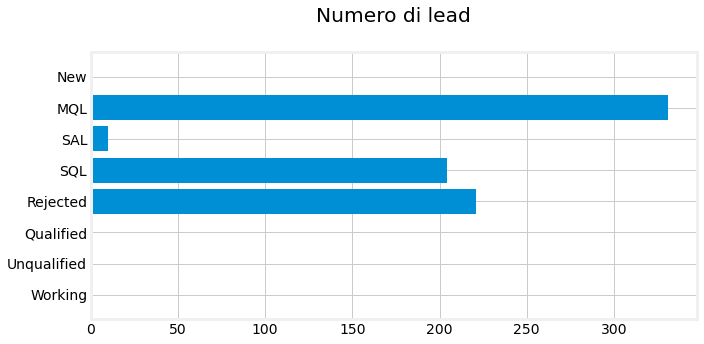

In [33]:
df = g_status["Lead ID"].nunique().reset_index().rename(columns={"Lead ID":"N.Lead"})

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor("white")

hbar= ax.barh(df["Lead Status cat"], df["N.Lead"])
ax.invert_yaxis()
ax.set_facecolor("white")
ax.set_title("Numero di lead", pad=30)
plt.tight_layout()
plt.show();
fig.savefig(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\numero_lead.png", facecolor=fig.get_facecolor(), transparent=True, dpi=300, bbox_inches = "tight")

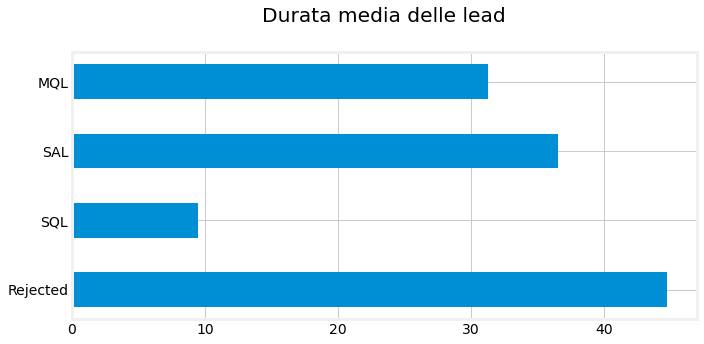

In [34]:
df = g_status["Lead Age"].mean().reset_index()

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor("white")

hbar= ax.barh(df["Lead Status cat"], df["Lead Age"], height=0.5)
ax.invert_yaxis()
ax.set_facecolor("white")
ax.set_title("Durata media delle lead", pad=30)
plt.tight_layout()
plt.show();
fig.savefig(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\durata_lead.png", facecolor=fig.get_facecolor(), transparent=True, dpi=300, bbox_inches = "tight")

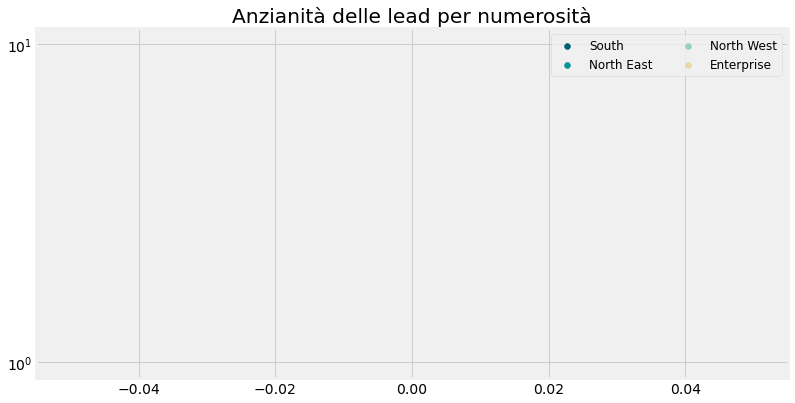

In [36]:
df = lead_op.loc[lead_op["Owner Role Name"].isin(tm), ["Lead Age", "Owner Role Name","Lead ID"]].groupby(["Lead Age", "Owner Role Name"], as_index=False).count()
df["Color"] = df["Owner Role Name"].map({"IT Central & South Sales Team":0, "IT North East Sales Team":1, "IT North West Sales Team":2, "IT Enterprise Specialists Sales Team":3})

fig, ax = plt.subplots(figsize=(12, 6))
cs = ax.scatter(x=df.loc[df["Owner Role Name"].str.contains("South"),"Lead Age"], y=df.loc[df["Owner Role Name"].str.contains("South"),"Lead ID"], c="#005F73")
ne = ax.scatter(x=df.loc[df["Owner Role Name"].str.contains("North East"),"Lead Age"], y=df.loc[df["Owner Role Name"].str.contains("North East"),"Lead ID"], c="#0A9396")
nw = ax.scatter(x=df.loc[df["Owner Role Name"].str.contains("North West"),"Lead Age"], y=df.loc[df["Owner Role Name"].str.contains("North West"),"Lead ID"], c="#94D2BD")
en = ax.scatter(x=df.loc[df["Owner Role Name"].str.contains("Enterprise"),"Lead Age"], y=df.loc[df["Owner Role Name"].str.contains("Enterprise"),"Lead ID"], c="#E9D8A6")

ax.set_yscale('log')

plt.legend((cs, ne, nw, en),
           ('South', 'North East', 'North West', 'Enterprise'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=12)

ax.set_title("Anzianità delle lead per numerosità")

fig.set_facecolor("white")

#c=df["Owner Role Name"].astype('category').cat.codes
#legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="TM")
#ax.add_artist(legend1)

#plt.tight_layout()
plt.show();

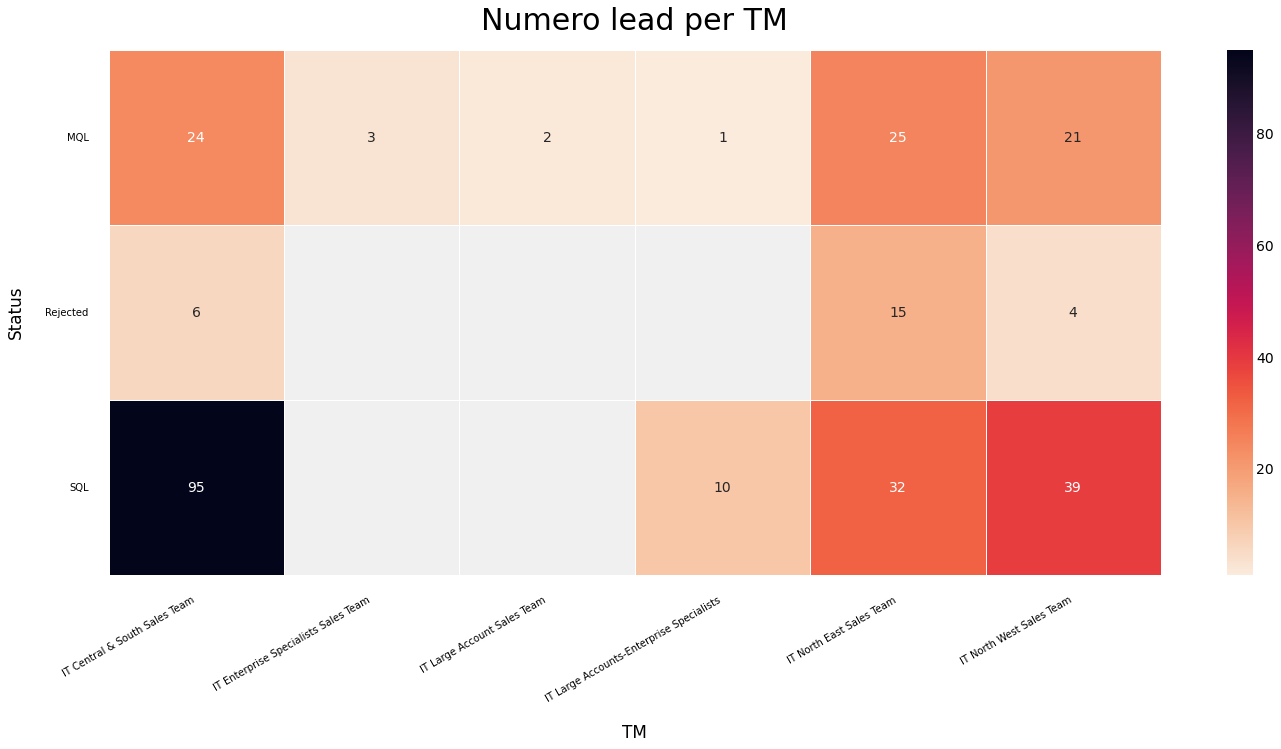

In [68]:
n_lead_owner_role = lead_op.groupby(["Owner Role Name"])["Lead ID"].transform("size")
tm =["IT Central & South Sales Team", "IT Enterprise Specialists Sales Team", "IT Large Account Sales Team", "IT Large Accounts-Enterprise Specialists", "IT North East Sales Team", "IT North West Sales Team"]

status = ["MQL","SQL","Rejected"]
filt = ((lead_op["Lead Status"].isin(status))  & (n_lead_owner_role>=0)) & lead_op["Owner Role Name"].isin(tm)
#& lead_op["Owner Role Name"].isin(tm)

lead_owner_status = lead_op.loc[filt, ["Lead Status", "Owner Role Name","Lead ID"]].groupby(["Lead Status", "Owner Role Name"], dropna=False).count().unstack(level=(1))
owner = lead_owner_status.columns.droplevel(level=0).to_list()
status = lead_owner_status.index.to_list()
lead = lead_owner_status.to_numpy()

fig, ax = plt.subplots(figsize=(21,9))

#cmap=sns.diverging_palette(145, 145, s=60, l=60, sep=50, n=100)

fmt=',.0f'
cmap = sns.cm.rocket_r

sns.heatmap(lead, xticklabels=owner, yticklabels=status, annot=True, fmt=fmt, cmap=cmap, cbar=True, square=False,linewidths=.5)
fig.set_facecolor("white")

#ax.set_ylim(0, len(status))
ax.set_xlabel("TM", labelpad=20)
ax.set_ylabel("Status", labelpad=20)
ax.tick_params(axis='both', which='both', pad=20, labelsize=10, rotation=0)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.set_title("Numero lead per TM", size=30, pad=20)

plt.show();
fig.savefig(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\numero_lead_solo_TM_2022.png", facecolor=fig.get_facecolor(), transparent=True, dpi=300, bbox_inches = "tight")
lead_owner_status.to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\numero_lead_solo_TM_2022.xlsx")

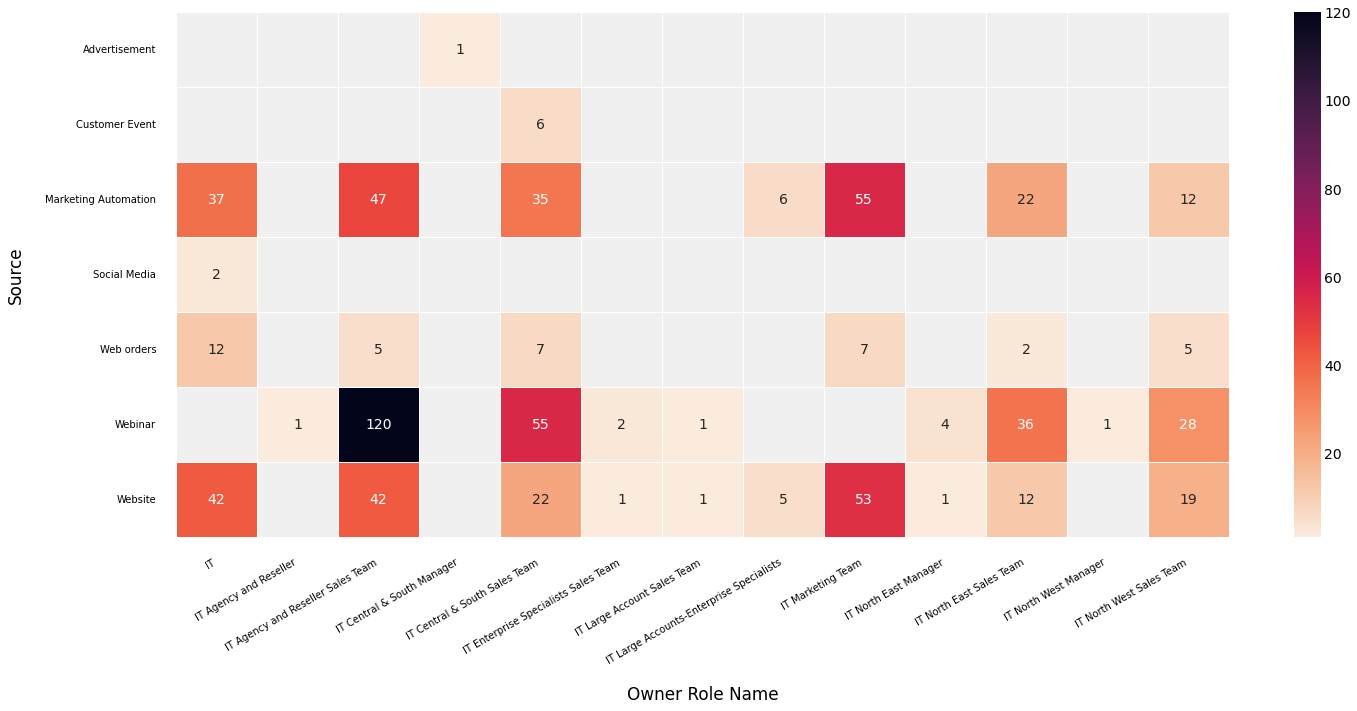

In [51]:
n_lead_owner_role = lead_op.groupby(["Owner Role Name"])["Lead ID"].transform("size")
#tm =["IT Central & South Sales Team","IT North East Sales Team","IT North West Sales Team","IT Enterprise Specialists Sales Team"]
status = ["MQL","SQL","Rejected"]
filt = ((lead_op["Lead Status"].isin(status))   & (n_lead_owner_role>0))
#& (lead_op["Owner Role Name"].isin(tm))


lead_owner_source = lead_op.loc[filt, ["Owner Role Name", "Lead Source","Lead ID"]].groupby(["Owner Role Name", "Lead Source"]).count().unstack(level=(0))
source = lead_owner_source.columns.droplevel(level=0).to_list()
status = lead_owner_source.index.to_list()
lead = lead_owner_source.to_numpy()

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(21,9), nrows = 1, ncols=1)
fig.set_facecolor("white")

#cmap=sns.diverging_palette(145, 145, s=60, l=60, sep=50, n=100)

fmt=',.0f'
cmap = sns.cm.rocket_r

sns.heatmap(lead, ax=ax, xticklabels=source, yticklabels=status, annot=True, fmt=fmt, cmap=cmap, cbar=True, square=False,linewidths=.5)
#sns.heatmap(lead, ax=ax[1], xticklabels=source, yticklabels=status, annot=True, fmt=fmt, cmap=cmap, cbar=True, square=False,linewidths=.5)
#sns.heatmap(lead, ax=ax[2], xticklabels=source, yticklabels=status, annot=True, fmt=fmt, cmap=cmap, cbar=True, square=False,linewidths=.5)

#ax.set_ylim(0, len(status))
ax.set_xlabel("Owner Role Name", labelpad=20)
ax.set_ylabel("Source", labelpad=20)
ax.tick_params(axis='both', which='both', pad=20, labelsize=10, rotation=0)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

#plt.suptitle("Numero lead per source")

plt.show();
fig.savefig(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\numero_lead_per_source_2022.png", facecolor=fig.get_facecolor(), transparent=True, dpi=300, bbox_inches = "tight")

lead_op.loc[filt, ["Owner Role Name", "Lead Source","Lead ID"]].groupby(["Owner Role Name", "Lead Source"]).count().unstack(level=(0)).to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\numero_lead_per_source_2022.xlsx")

In [ ]:
lead_op.info()

In [ ]:
filt = lead_op["Lead Status"].isin(["SQL"])
lead_op.loc[filt, ["Lead ID", "Lead Status","Created Date", "Converted Date", "SAL Duration", "MQL Duration", "Lead Age"]]

In [ ]:
g_status.size()